In [1]:
# Set up simple CNN for MNIST hand-written digits image recognition
#import the necessary libraries 
%matplotlib inline

import tensorflow as tf 
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

7


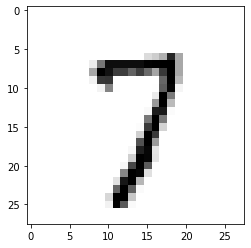

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

image_index = 258 # You may select anything up to 60,000
print(y_train[image_index]) # The label 
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
#check the shape of the imput elements

x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [7]:
# Creating a Sequential Model and adding the layers
#layerconv = Conv2D(28, kernel_size=(3,3), input_shape=input_shape)
#print(layerconv.kernel)
#print(layerconv.kernel_initializer.seed)
#print("*******")
#layerconv = Dropout(0.2)
#print(layerconv.strides)
#print(layerconv.kernel_initializer)


model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history=model.fit(x=x_train,y=y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3508 - accuracy: 0.8899
Epoch 2/100
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1354 - accuracy: 0.9574
Epoch 3/100
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1003 - accuracy: 0.9684
Epoch 4/100
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0807 - accuracy: 0.9744
Epoch 5/100
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0697 - accuracy: 0.9775: 37s  - ETA: 34s
Epoch 6/100
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0584 - accuracy: 0.98110s - los
Epoch 7/100
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0550 - accuracy: 0.9816
Epoch 8/100
1875/1875 [==============================] - 70s 38ms/step - loss: 0.0463 - accuracy: 0.9848
Epoch 9/100
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0438 - accuracy: 0.9851
Epoch 10/100
1875/1875 [======

1875/1875 [==============================] - 53s 28ms/step - loss: 0.0194 - accuracy: 0.9947
Epoch 77/100
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0162 - accuracy: 0.9955
Epoch 78/100
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0198 - accuracy: 0.9948
Epoch 79/100
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0215 - accuracy: 0.9948
Epoch 80/100
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0190 - accuracy: 0.9953
Epoch 81/100
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0190 - accuracy: 0.9958
Epoch 82/100
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0196 - accuracy: 0.9950
Epoch 83/100
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0263 - accuracy: 0.9936
Epoch 84/100
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0180 - accuracy: 0.9952
Epoch 85/100
1875/1875 [==============================] - 5

In [9]:
import pandas as pd 
# convert the history.history dict to a pandas DataFrame:     
hist_d = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history100no.json' 
with open(hist_json_file, mode='w') as f:
    hist_d.to_json(f)

In [10]:
#Code to get the output of network layers

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# Testing
test = np.random.random(input_shape)[np.newaxis,...]
layer_outs = [func([test]) for func in functors]
#print(layer_outs)
print(layer_outs[0][0][0][0][0])

[-0.03051601 -0.18540196  0.01216231  0.04262941  0.13885109  0.07972247
  0.15594918 -0.37292588  0.1724967   0.13544579  0.20389012 -0.23184218
  0.24240196  0.10762244 -0.11598707  0.12577358 -0.7251633  -0.08387489
 -0.01004252  0.03202165 -0.04986656 -0.13540177 -0.04013888 -0.03569293
 -0.31301963 -0.01250107 -0.12953977 -0.26251   ]


In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2814 - accuracy: 0.9779


[0.2813710570335388, 0.9779000282287598]

5


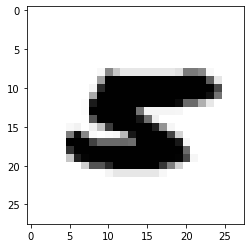

In [12]:
image_index = 7850
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [13]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('modelno100.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Dell\AppData\Local\Temp\tmpeh888qtt\assets
